In [93]:
import pandas as pd
import requests
from sklearn.neighbors import NearestNeighbors


url = "https://data.lacity.org/resource/s49e-q6j2.json"
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
df['latitude'] = df['latlng'].apply(lambda x: float(x['latitude']))
df['longitude'] = df['latlng'].apply(lambda x: float(x['longitude']))
features = ['latitude', 'longitude']
X = df[features]
k = 5  
nn_model = NearestNeighbors(n_neighbors=k)
nn_model.fit(X)
def recommend_parking_spots(location):
    location_df = pd.DataFrame([[location['latitude'], location['longitude']]], columns=features)
    _, indices = nn_model.kneighbors(location_df)
    recommended_latitudes = df.loc[indices[0], 'latitude'].tolist()
    recommended_longitudes = df.loc[indices[0], 'longitude'].tolist()
    recommended_spots = df.loc[indices[0]]
    return recommended_latitudes, recommended_longitudes, recommended_spots 

input_location = {'latitude': 34.04571, 'longitude': -118.26264}
recommended_latitudes, recommended_longitudes, recommended_spots = recommend_parking_spots(input_location)
print("Recommended parking spots:")
print(recommended_spots)

Recommended parking spots:
    spaceid           blockface     metertype ratetype      raterange  \
473  CB1619   900 S FIGUEROA ST  Single-Space      TOD  $5.00 - $6.00   
682   CB101   800 S FIGUEROA ST  Single-Space     FLAT          $2.00   
76   CB3375    601 W OLYMPIC BL  Single-Space      TOD  $0.50 - $2.00   
819  CB1605  801 W OLYMPIC BLVD  Single-Space      TOD  $0.50 - $3.00   
113  CB1374      1000 S HOPE ST  Single-Space      TOD  $0.50 - $2.00   

    timelimit                                             latlng  \
473       4HR  {'latitude': '34.045558', 'longitude': '-118.2...   
682       2HR  {'latitude': '34.046801', 'longitude': '-118.2...   
76        4HR  {'latitude': '34.044039', 'longitude': '-118.2...   
819       4HR  {'latitude': '34.045275', 'longitude': '-118.2...   
113       4HR  {'latitude': '34.043305', 'longitude': '-118.2...   

    :@computed_region_qz3q_ghft :@computed_region_k96s_3jcv  \
473                       23076                         547   

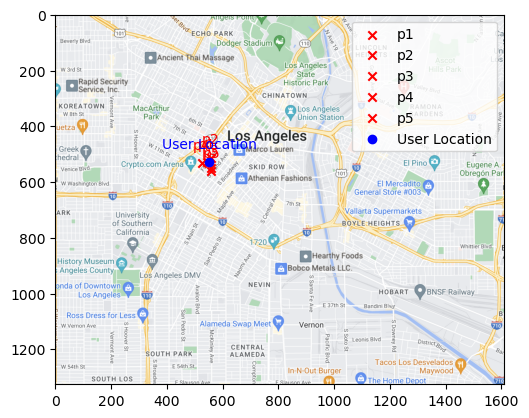

In [99]:
import matplotlib.pyplot as plt
from PIL import Image


user_lat = 34.04571
user_lng = -118.26264
lat1, lng1 = 34.08331, -118.30946
lat2, lng2 = 33.98885, -118.17271
map_image = Image.open("la.png")
plt.imshow(map_image)
image_width = map_image.size[0]
image_height = map_image.size[1]
target_lat1 = recommended_latitudes[0]
target_lng1 = recommended_longitudes[0]
target_lat2 = recommended_latitudes[1]
target_lng2 = recommended_longitudes[1]
target_lat3 = recommended_latitudes[2]
target_lng3 = recommended_longitudes[2]
target_lat4 = recommended_latitudes[3]
target_lng4 = recommended_longitudes[3]
target_lat5 = recommended_latitudes[4]
target_lng5 = recommended_longitudes[4]
x1 = int((target_lng1 - lng1) * (image_width / (lng2 - lng1)))
y1 = int((lat1 - target_lat1) * (image_height / (lat1 - lat2)))
x2 = int((target_lng2 - lng1) * (image_width / (lng2 - lng1)))
y2 = int((lat1 - target_lat2) * (image_height / (lat1 - lat2)))
x3 = int((target_lng3 - lng1) * (image_width / (lng2 - lng1)))
y3 = int((lat1 - target_lat3) * (image_height / (lat1 - lat2)))
x4 = int((target_lng4 - lng1) * (image_width / (lng2 - lng1)))
y4 = int((lat1 - target_lat4) * (image_height / (lat1 - lat2)))
x5 = int((target_lng5 - lng1) * (image_width / (lng2 - lng1)))
y5 = int((lat1 - target_lat5) * (image_height / (lat1 - lat2)))

x = int((user_lng - lng1) * (image_width / (lng2 - lng1)))
y = int((lat1 - user_lat) * (image_height / (lat1 - lat2)))

plt.scatter(x1, y1, color='red', marker='x', label='p1')
plt.scatter(x2, y2, color='red', marker='x', label='p2')
plt.scatter(x3, y3, color='red', marker='x', label='p3')
plt.scatter(x4, y4, color='red', marker='x', label='p4')
plt.scatter(x5, y5, color='red', marker='x', label='p5')
plt.scatter(x, y, color='blue', marker='o', label='User Location')
plt.annotate('p1', (x1, y1), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate('p2', (x2, y2), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate('p3', (x3, y3), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate('p4', (x4, y4), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate('p5', (x5, y5), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate('User Location', (x, y), textcoords="offset points", xytext=(0,10), ha='center', color='blue')

plt.legend()
plt.show()

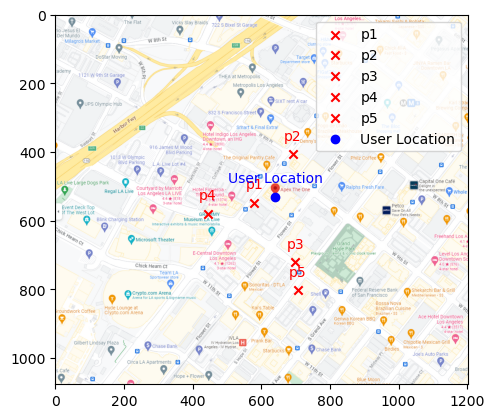

In [98]:
import matplotlib.pyplot as plt
from PIL import Image
user_lat = 34.04571
user_lng = -118.26264
lat1, lng1 = 34.05038, -118.26948
lat2, lng2 = 34.04090, -118.25666
map_image = Image.open("apex.png")
plt.imshow(map_image)

image_width = map_image.size[0]
image_height = map_image.size[1]

target_lat1 = recommended_latitudes[0]
target_lng1 = recommended_longitudes[0]
target_lat2 = recommended_latitudes[1]
target_lng2 = recommended_longitudes[1]
target_lat3 = recommended_latitudes[2]
target_lng3 = recommended_longitudes[2]
target_lat4 = recommended_latitudes[3]
target_lng4 = recommended_longitudes[3]
target_lat5 = recommended_latitudes[4]
target_lng5 = recommended_longitudes[4]

x1 = int((target_lng1 - lng1) * (image_width / (lng2 - lng1)))
y1 = int((lat1 - target_lat1) * (image_height / (lat1 - lat2)))
x2 = int((target_lng2 - lng1) * (image_width / (lng2 - lng1)))
y2 = int((lat1 - target_lat2) * (image_height / (lat1 - lat2)))
x3 = int((target_lng3 - lng1) * (image_width / (lng2 - lng1)))
y3 = int((lat1 - target_lat3) * (image_height / (lat1 - lat2)))
x4 = int((target_lng4 - lng1) * (image_width / (lng2 - lng1)))
y4 = int((lat1 - target_lat4) * (image_height / (lat1 - lat2)))
x5 = int((target_lng5 - lng1) * (image_width / (lng2 - lng1)))
y5 = int((lat1 - target_lat5) * (image_height / (lat1 - lat2)))

x = int((user_lng - lng1) * (image_width / (lng2 - lng1)))
y = int((lat1 - user_lat) * (image_height / (lat1 - lat2)))

plt.scatter(x1, y1, color='red', marker='x', label='p1')
plt.scatter(x2, y2, color='red', marker='x', label='p2')
plt.scatter(x3, y3, color='red', marker='x', label='p3')
plt.scatter(x4, y4, color='red', marker='x', label='p4')
plt.scatter(x5, y5, color='red', marker='x', label='p5')
plt.scatter(x, y, color='blue', marker='o', label='User Location')

plt.annotate('p1', (x1, y1), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate('p2', (x2, y2), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate('p3', (x3, y3), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate('p4', (x4, y4), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate('p5', (x5, y5), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate('User Location', (x, y), textcoords="offset points", xytext=(0,10), ha='center', color='blue')

plt.legend()
plt.show()

In [100]:
import pandas as pd
import requests
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from geopy.distance import geodesic


response = requests.get('https://data.lacity.org/resource/s49e-q6j2.json')
data = response.json()
df = pd.DataFrame(data)
df['latitude'] = pd.to_numeric(df['latlng'].apply(lambda x: x.get('latitude')))
df['longitude'] = pd.to_numeric(df['latlng'].apply(lambda x: x.get('longitude')))
df['rate'] = df['raterange'].str.extract('(\d+\.\d+)').astype(float)
df['timelimit'] = df['timelimit'].str.extract('(\d+)').astype(int) * 60
user_location = (34.04571, -118.26264) 

df['distance'] = df.apply(lambda row: geodesic(user_location, (row['latitude'], row['longitude'])).miles, axis=1)
df = df[df['timelimit'] >= 120]
df['score'] = df['distance'] * 0.5 + df['rate'] * 0.5

df_sorted = df.sort_values(by='score')

recommended_spot = df_sorted.iloc[0]

print(recommended_spot)

spaceid                                                                   CB3375
blockface                                                       601 W OLYMPIC BL
metertype                                                           Single-Space
ratetype                                                                     TOD
raterange                                                          $0.50 - $2.00
timelimit                                                                    240
latlng                         {'latitude': '34.044039', 'longitude': '-118.2...
:@computed_region_qz3q_ghft                                                23076
:@computed_region_k96s_3jcv                                                  547
:@computed_region_tatf_ua23                                                 1050
:@computed_region_kqwf_mjcx                                                    9
:@computed_region_2dna_qi2s                                                   76
:@computed_region_ur2y_g4cx 

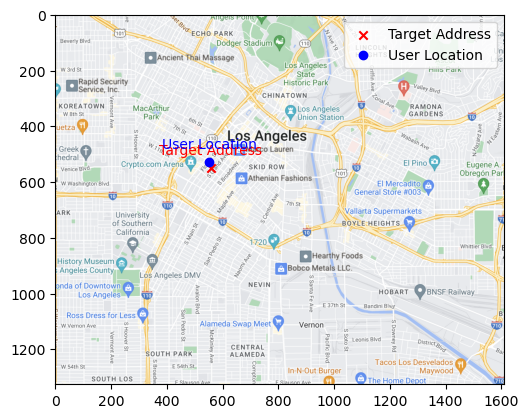

In [101]:
import matplotlib.pyplot as plt
from PIL import Image

user_lat = 34.04571
user_lng = -118.26264
lat1, lng1 = 34.08331, -118.30946
lat2, lng2 = 33.98885, -118.17271

map_image = Image.open("la.png")
plt.imshow(map_image)
image_width = map_image.size[0]
image_height = map_image.size[1]
target_lat = recommended_spot['latitude']
target_lng = recommended_spot['longitude']
x = int((target_lng - lng1) * (image_width / (lng2 - lng1)))
y = int((lat1 - target_lat) * (image_height / (lat1 - lat2)))

x1 = int((user_lng - lng1) * (image_width / (lng2 - lng1)))
y1 = int((lat1 - user_lat) * (image_height / (lat1 - lat2)))
plt.scatter(x, y, color='red', marker='x', label='Target Address')
plt.scatter(x1, y1, color='blue', marker='o', label='User Location') 
plt.annotate('Target Address', (x, y), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate('User Location', (x1, y1), textcoords="offset points", xytext=(0,10), ha='center', color='blue')


plt.legend()

plt.show()

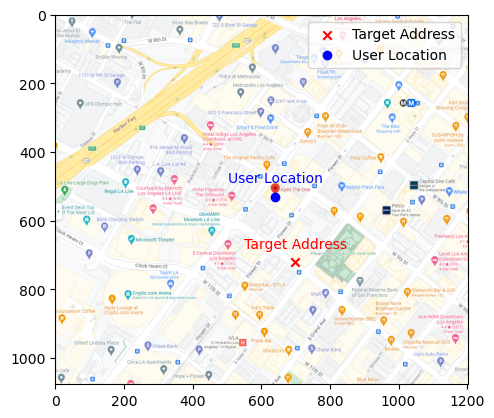

In [102]:
import matplotlib.pyplot as plt
from PIL import Image

user_lat = 34.04571
user_lng = -118.26264

lat1, lng1 = 34.05038, -118.26948
lat2, lng2 = 34.04090, -118.25666
map_image = Image.open("apex.png")
plt.imshow(map_image)
image_width = map_image.size[0]
image_height = map_image.size[1]
target_lat = recommended_spot['latitude']
target_lng = recommended_spot['longitude']

x = int((target_lng - lng1) * (image_width / (lng2 - lng1)))
y = int((lat1 - target_lat) * (image_height / (lat1 - lat2)))

x1 = int((user_lng - lng1) * (image_width / (lng2 - lng1)))
y1 = int((lat1 - user_lat) * (image_height / (lat1 - lat2)))
plt.scatter(x, y, color='red', marker='x', label='Target Address')
plt.scatter(x1, y1, color='blue', marker='o', label='User Location') 
plt.annotate('Target Address', (x, y), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate('User Location', (x1, y1), textcoords="offset points", xytext=(0,10), ha='center', color='blue')

plt.legend()
plt.show()